## Loading Data and Merging CSV Files

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

df = pd.read_csv('merged.csv')

### Previously read and merged data frames with code below:

df = pd.read_csv('Datasets/Walmart_Sales_Forecasting.csv')  
df2 = pd.read_csv('Datasets/Walmart_features.csv')  
df3 = pd.read_csv('Datasets/walmart_store_details.csv')  

dfnew = pd.merge(df, df2, on=['Store', 'Date', 'IsHoliday'])  
df_final = pd.merge(dfnew, df3, on='Store')  
df_final.to_csv('merged.csv')  

## Exploratory Data Analysis

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Unnamed: 0      421570 non-null int64
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(4), object(2)
memory usage: 51.9+ MB


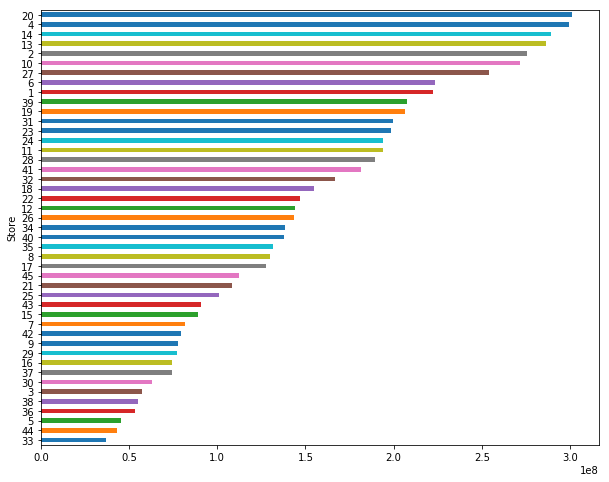

In [40]:
df.groupby('Store')['Weekly_Sales'].sum().sort_values().plot(kind='barh', figsize=(10,8))

In [42]:
#Convert date column to datetime object
df.Date = df.Date.astype('datetime64')

[]

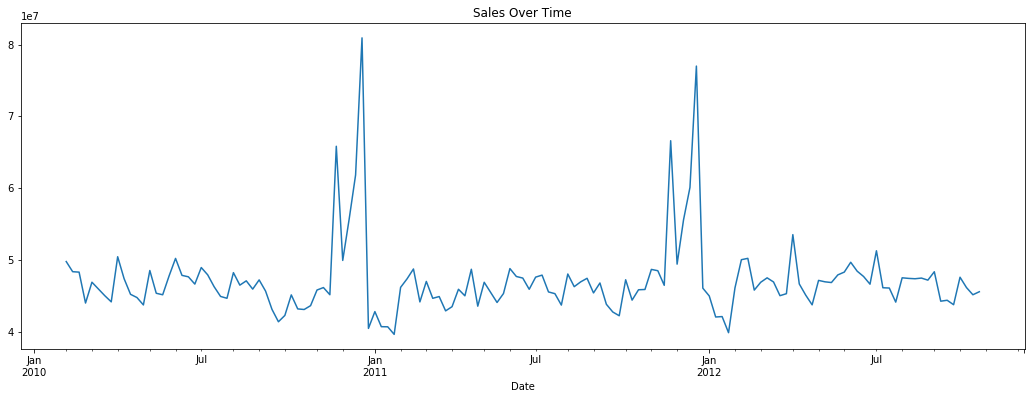

In [43]:
#Are there patterns in weekly sales over time
a = df.groupby('Date')['Weekly_Sales'].sum().plot(kind='line', figsize=(18, 6))
plt.title('Sales Over Time')
a.plot()

In [23]:
#Sales are higher on holiday weeks
df.groupby('IsHoliday')['Weekly_Sales'].mean().sort_values()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Unnamed: 0      421570 non-null int64
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(4), object(1)
memory usage: 51.9+ MB


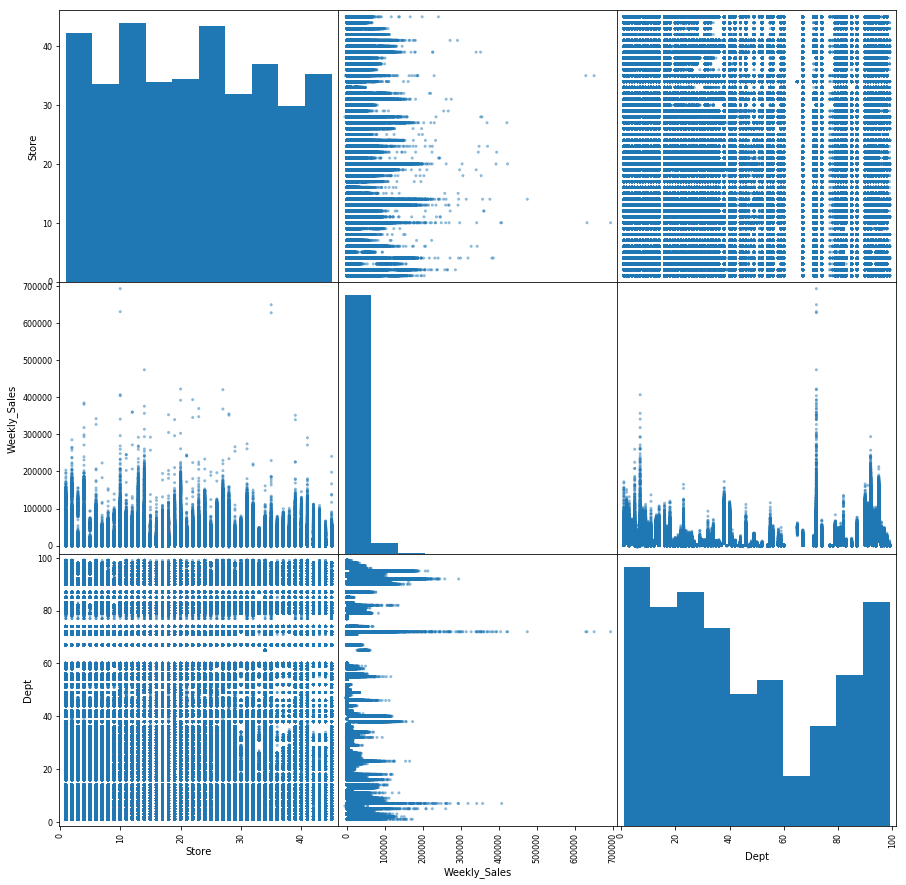

In [23]:
pd.plotting.scatter_matrix(df[['Store','Weekly_Sales','Dept']], figsize=(15,15));

In [17]:
#Convert boolean feature to numeric
df["IsHoliday"].astype("int")
df["IsHoliday"]=df["IsHoliday"].astype("int")
df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [45]:
#Pull year month and day columns from date column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.week

In [46]:
#drop strange unnamed column
df.drop(columns='Unnamed: 0', inplace=True)

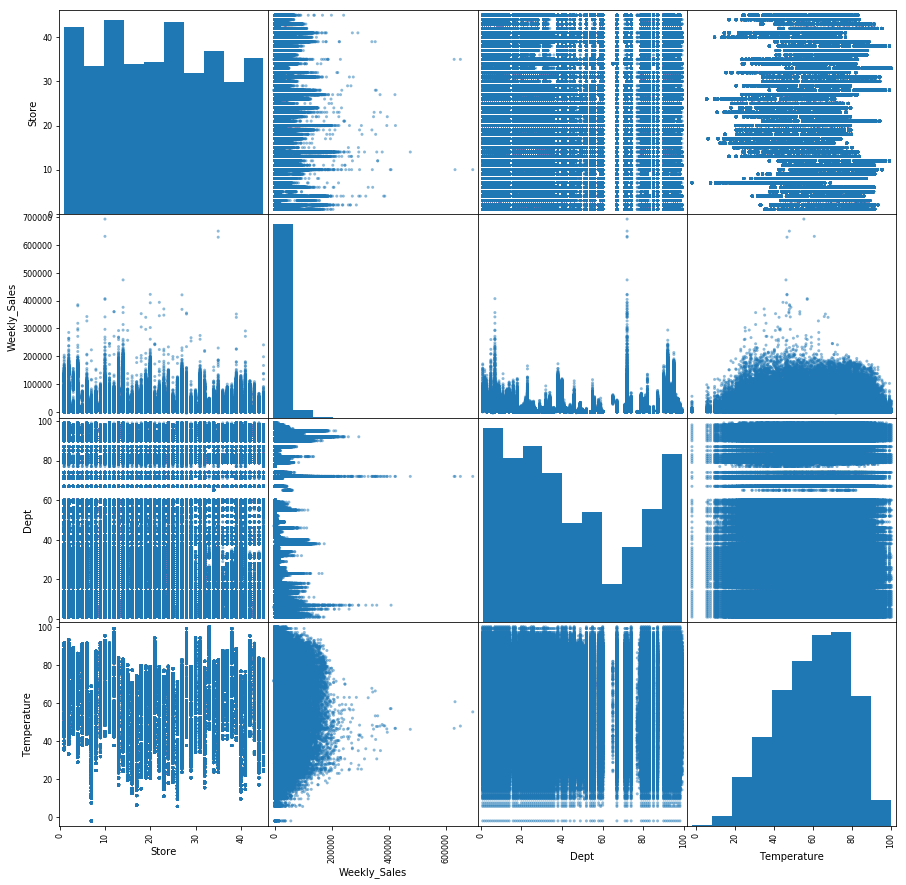

In [46]:
pd.plotting.scatter_matrix(df[['Store','Weekly_Sales','Dept','Temperature']], figsize=(15,15));

In [47]:
#Create features for temperature ranges
tempRange = []

for row in df['Temperature']: 
    if row > 85:
        tempRange.append('7')
    elif row > 75:
        tempRange.append('6')
    elif row > 65:
        tempRange.append('5')
    elif row > 55:
        tempRange.append('4')
    elif row > 45:
        tempRange.append('3')
    elif row > 35:
        tempRange.append('2')
    else:
        tempRange.append('1')

df['tempRange'] = tempRange
df.tempRange = df.tempRange.astype('float')

In [48]:
#drop redundant date columns
df.drop(columns='Date', inplace=True)
df.drop(columns='month', inplace=True)

In [49]:
#create dummy variables for store,dept,type
df_dum1 = pd.get_dummies(df['Store'])
df_dum2 = pd.get_dummies(df['Dept'])
df_dum3 = pd.get_dummies(df['Type'])

In [50]:
#concatenate dummy data frames
df_dummies = pd.concat([df, df_dum1, df_dum2, df_dum3], axis=1)

In [51]:
#drop redundant columns and columns with mostly NA
df_dummies.drop(columns=['Type','Store','Dept','MarkDown1','MarkDown2','MarkDown3','MarkDown4','tempRange'], inplace=True)
df_dummies.dropna(axis=1, inplace=True)

In [ ]:
#save final cleaned data frame to csv
df_dummies.to_csv('dummies.csv')

# Define Variables, Create an Initial Model and Measure Model Performance

In [52]:
#df_dummies.info(verbose=True)
#df_dummies.Weekly_Sales.dtype
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Columns: 138 entries, Weekly_Sales to C
dtypes: bool(1), float64(5), int64(3), uint8(129)
memory usage: 78.0 MB


In [53]:
X = df_dummies.drop('Weekly_Sales', axis=1)
y = df_dummies.Weekly_Sales

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.6582728504736949
Test R^2: 0.6576340779515
Training MSE: 176827389.06635
Testing MSE: 174890247.4772672




/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Model Stats for: Lasso
Train R^2: 0.6581937625120888
Test R^2: 0.6575432398350911
Training MSE: 176868313.28842822
Testing MSE: 174936650.1699303


Model Stats for: Ridge
Train R^2: 0.6582717767762825
Test R^2: 0.6576324552778025
Training MSE: 176827944.65319857
Testing MSE: 174891076.38512942




### Cross Validation

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LassoCV()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('LassoCV'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')  

Model Stats for: LassoCV
Train R^2: 0.058710997109377334
Test R^2: 0.06167907817305118
Training MSE: 486155319.48871696
Testing MSE: 482063981.48199916
Model details: LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)




In [56]:
model = RidgeCV()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('RidgeCV'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')    

Model Stats for: RidgeCV
Train R^2: -70.47196375275047
Test R^2: -71.35503519512783
Training MSE: 36913716473.89991
Testing MSE: 37172523318.05753
Model details: RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)




## Feature Engineering and Refinements

### Normalize data frame with dummies (removed null values earlier)

In [57]:
from sklearn import preprocessing

In [58]:
#normalize data frame
x = df_dummies.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_dummies_normalized = pd.DataFrame(x_scaled, columns=df_dummies.columns)

/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [59]:
X = df_dummies_normalized.drop('Weekly_Sales', axis=1)
y = df_dummies_normalized.Weekly_Sales

### Fit model to normalized data frame

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.6552577792812951
Test R^2: 0.6668378402344655
Training MSE: 0.0003670670522990421
Testing MSE: 0.0003462836377895277


Model Stats for: Lasso
Train R^2: 0.0
Test R^2: -2.419943267417679e-05
Training MSE: 0.0010647580430786672
Testing MSE: 0.0010394098114288014


Model Stats for: Ridge
Train R^2: 0.6552578898489556
Test R^2: 0.6668444759299142
Training MSE: 0.00036706693457123647
Testing MSE: 0.000346276740749477




### Cross Validate Normalized Data Frames

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LassoCV()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('LassoCV'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')  

Model Stats for: LassoCV
Train R^2: 0.6572602271759441
Test R^2: 0.659752264196011
Training MSE: 0.00036289803410071076
Testing MSE: 0.0003597208864640028
Model details: LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)




In [62]:
model = RidgeCV()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('RidgeCV'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')

Model Stats for: RidgeCV
Train R^2: 0.6574680394424197
Test R^2: 0.6600516761956745
Training MSE: 0.0003626779993427234
Testing MSE: 0.00035940433843560096
Model details: RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)




### Polynomial Regression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Make a pipeline model with polynomial transformation
#Currently with basic ridge.
#Could use and LASSO regression with cross-validation, (included in comments)
degree_min = 2
degree_max = 4

degrees = []
train_errs = []
test_errs = []
#train_mse = []
#test_mse = []
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False),
                          Ridge()
                         )
    #Could replace Ridge() above with a more complicated cross validation method to improve tuning
    #using a cross validation method will substantially increase runtime
    model.fit(X_train,y_train)
    #Get r^2 values for testing predictions and training predictions
    test_score = model.score(X_test,y_test)
    test_errs.append(test_score)

    
    train_score = model.score(X_train,y_train)
    train_errs.append(train_score)
    
    degrees.append(degree)
#Create Plot
plt.scatter(degrees, train_errs, label='Train R^2')
plt.scatter(degrees, test_errs, label='Test R^2')
plt.title('Train and Test Accuracy vs Model Complexity')
plt.xlabel('Maximum Degree of Polynomial Regression')
plt.legend()

KeyboardInterrupt: 

### Polynomial Regression doesn't finish with dummy data frame, too many features. Using non dummy data frame instead

In [67]:
df.drop(columns='Type', inplace=True)

In [69]:
df.dropna(axis=1, inplace=True)

In [70]:
#normalize non dummy data frame
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns=df.columns)

/Users/joelkaplan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [71]:
X = df_normalized.drop('Weekly_Sales', axis=1)
y = df_normalized.Weekly_Sales

In [72]:
model = make_pipeline(PolynomialFeatures(2, interaction_only=False),
                          Ridge()
                         )
#Could replace Ridge() above with a more complicated cross validation method to improve tuning
#using a cross validation method will substantially increase runtime
X_train, X_test, y_train, y_test = train_test_split(X, y)


model.fit(X_train,y_train)
test_score = model.score(X_test,y_test)
print('R^2 Test:', test_score)
train_score = model.score(X_train,y_train)
print('R^2 Train:', train_score)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('Poynomial Degree 2 with Ridge'))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')    

R^2 Test: 0.2068027840496699
R^2 Train: 0.2063096754370517
Model Stats for: Poynomial Degree 2 with Ridge
Training MSE: 0.0008447355818198835
Testing MSE: 0.000825508591324744
Model details: Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])




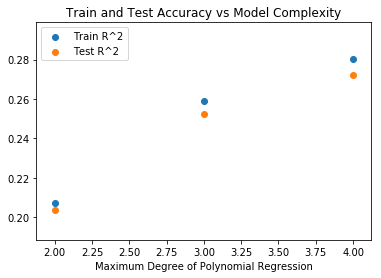

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Make a pipeline model with polynomial transformation
#Currently with basic ridge.
#Could use and LASSO regression with cross-validation, (included in comments)
degree_min = 2
degree_max = 4

degrees = []
train_errs = []
test_errs = []
#train_mse = []
#test_mse = []
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False),
                          Ridge()
                         )
    #Could replace Ridge() above with a more complicated cross validation method to improve tuning
    #using a cross validation method will substantially increase runtime
    model.fit(X_train,y_train)
    #Get r^2 values for testing predictions and training predictions
    test_score = model.score(X_test,y_test)
    test_errs.append(test_score)

    
    train_score = model.score(X_train,y_train)
    train_errs.append(train_score)
    
    degrees.append(degree)
#Create Plot
plt.scatter(degrees, train_errs, label='Train R^2')
plt.scatter(degrees, test_errs, label='Test R^2')
plt.title('Train and Test Accuracy vs Model Complexity')
plt.xlabel('Maximum Degree of Polynomial Regression')
plt.legend()

### Determine feature importance

In [37]:
model.coef_[1:10]

AttributeError: 'Pipeline' object has no attribute 'alpha_'

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logistic.coef_))], axis = 1)
coefficients